<a href="https://colab.research.google.com/github/ChonnaveeSuk/intro-Data-Science-KMUTNB/blob/main/Lecture3_ML_Supervise_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load iris data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
attributes = ["SepalLength" , "SepalWidth" , "PetalLength" , "PetalWidth" , "Class"]

In [ ]:
import pandas as pd

In [ ]:
#prepare the dat
iris = pd.read_csv(url, sep=',' , header=None , names=attributes , index_col=None)

In [ ]:
#Take the input X as numpy array
X = iris.drop('Class' , axis=1).values  #take numpy array with class attribute

In [ ]:
#Take the target y as numpy array
y = iris['Class'].values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
type (X)

numpy.ndarray

In [ ]:
type (y)

numpy.ndarray

In [ ]:
#import some classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix , classification_report)

In [ ]:
#split the data training set 70%, test set 30%
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=11)


In [ ]:
#Let's build a model a model from LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)

In [ ]:
#train the model by supplying input and targets
lr_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Test the trained model
pred = lr_clf.predict(X_test)

In [ ]:
#calculate for the test accuracy
print("Test Accuracy for LogisticRegression=" , accuracy_score(y_test,pred))

Test Accuracy for LogisticRegression= 0.9333333333333333


In [ ]:
print("Classsification Report")
print(classification_report(y_test,pred))

Classsification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [ ]:
# Test options and evaluation metric
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('GPC', GaussianProcessClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('ADC', AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [ ]:
models

[('CART', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('QDA', QuadraticDiscriminantAnalysis()),
 ('GPC', GaussianProcessClassifier()),
 ('MLP', MLPClassifier()),
 ('ADC', AdaBoostClassifier()),
 ('RFC', RandomForestClassifier())]

In [ ]:
#Evaluate the models
import random
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []
seed = random.seed(42)
for name, model in models :
  kfold = KFold (n_splits=10 , random_state=seed)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold , scoring=scoring)
  results.append (cv_results)
  names.append(name)
  msg = "%s : %f(%f)" % (name , cv_results.mean() , cv_results.std())
  print(msg)


CART : 0.971818(0.043112)
KNN : 0.962727(0.061180)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR : 0.980909(0.038236)
LDA : 0.980909(0.038236)
NB : 0.961818(0.046851)
SVM : 0.960909(0.065562)
QDA : 0.971818(0.059259)
GPC : 0.980909(0.038236)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP : 0.961818(0.062032)
ADC : 0.971818(0.043112)
RFC : 0.971818(0.043112)


In [ ]:
import matplotlib.pyplot as plt


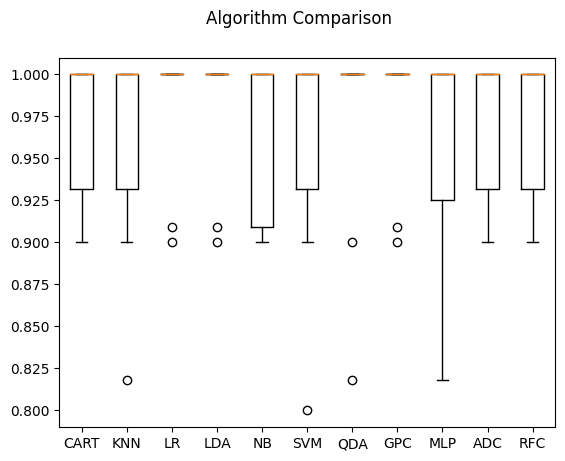

In [ ]:
#Compare the algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.groupby('Class') .count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50
